In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [50]:
data = pd.read_csv('Co2_Nettoye.csv')

In [51]:
data.head()

,Make,Model,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_City_L100km,Fuel_Hwy_L100km,Fuel_Comb_L100km,Fuel_Comb_mpg,CO2_Emissions_gkm
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [52]:
data.dtypes

Make                  object
Model                 object
Vehicle_Class         object
Engine_Size_L        float64
Cylinders              int64
Transmission          object
Fuel_Type             object
Fuel_City_L100km     float64
Fuel_Hwy_L100km      float64
Fuel_Comb_L100km     float64
Fuel_Comb_mpg          int64
CO2_Emissions_gkm      int64
dtype: object

# Séparation des variables selon leur types

In [53]:
# variables qualitatives
qual_vars = ['Make', 'Model', 'Vehicle_Class', 'Transmission', 'Fuel_Type']

In [54]:
# variables quantitatives
quant_vars = ['Engine_Size_L', 'Cylinders', 'Fuel_City_L100km', 
              'Fuel_Hwy_L100km', 'Fuel_Comb_L100km', 
              'Fuel_Comb_mpg', 'CO2_Emissions_gkm']

# Analyse des variables qualitatives

## Distribution empirique

In [55]:
from IPython.display import display #Pour afficher toutes la tables empirique sur notebook
for variable in qual_vars:
    
    table_empirique = data[variable].value_counts().to_frame(name='Effectif')
    table_empirique['Fréquence'] = table_empirique['Effectif'] / table_empirique['Effectif'].sum()
    display(table_empirique)


,Effectif,Fréquence
Make,,
FORD,577,0.091850
CHEVROLET,515,0.081980
BMW,501,0.079752
MERCEDES-BENZ,365,0.058103
PORSCHE,296,0.047119
GMC,289,0.046004
TOYOTA,276,0.043935
AUDI,263,0.041866
NISSAN,213,0.033906


,Effectif,Fréquence
Model,,
F-150 FFV,32,0.005094
F-150 FFV 4X4,31,0.004935
MUSTANG,27,0.004298
FOCUS FFV,24,0.003820
F-150 4X4,20,0.003184
...,...,...
Range Rover Velar P250,1,0.000159
Range Rover Evoque P300,1,0.000159
Range Rover Evoque P250,1,0.000159


,Effectif,Fréquence
Vehicle_Class,,
SUV - SMALL,1006,0.160140
MID-SIZE,983,0.156479
COMPACT,903,0.143744
SUV - STANDARD,613,0.097580
SUBCOMPACT,533,0.084846
FULL-SIZE,508,0.080866
PICKUP TRUCK - STANDARD,475,0.075613
TWO-SEATER,381,0.060649
MINICOMPACT,274,0.043617


,Effectif,Fréquence
Transmission,,
AS6,1139,0.181312
AS8,1056,0.168099
M6,773,0.123050
A6,684,0.108883
AM7,383,0.060968
A8,378,0.060172
AS7,283,0.045049
A9,263,0.041866
AV,241,0.038364


,Effectif,Fréquence
Fuel_Type,,
X,3039,0.483763
Z,2765,0.440146
E,330,0.052531
D,147,0.023400
N,1,0.000159


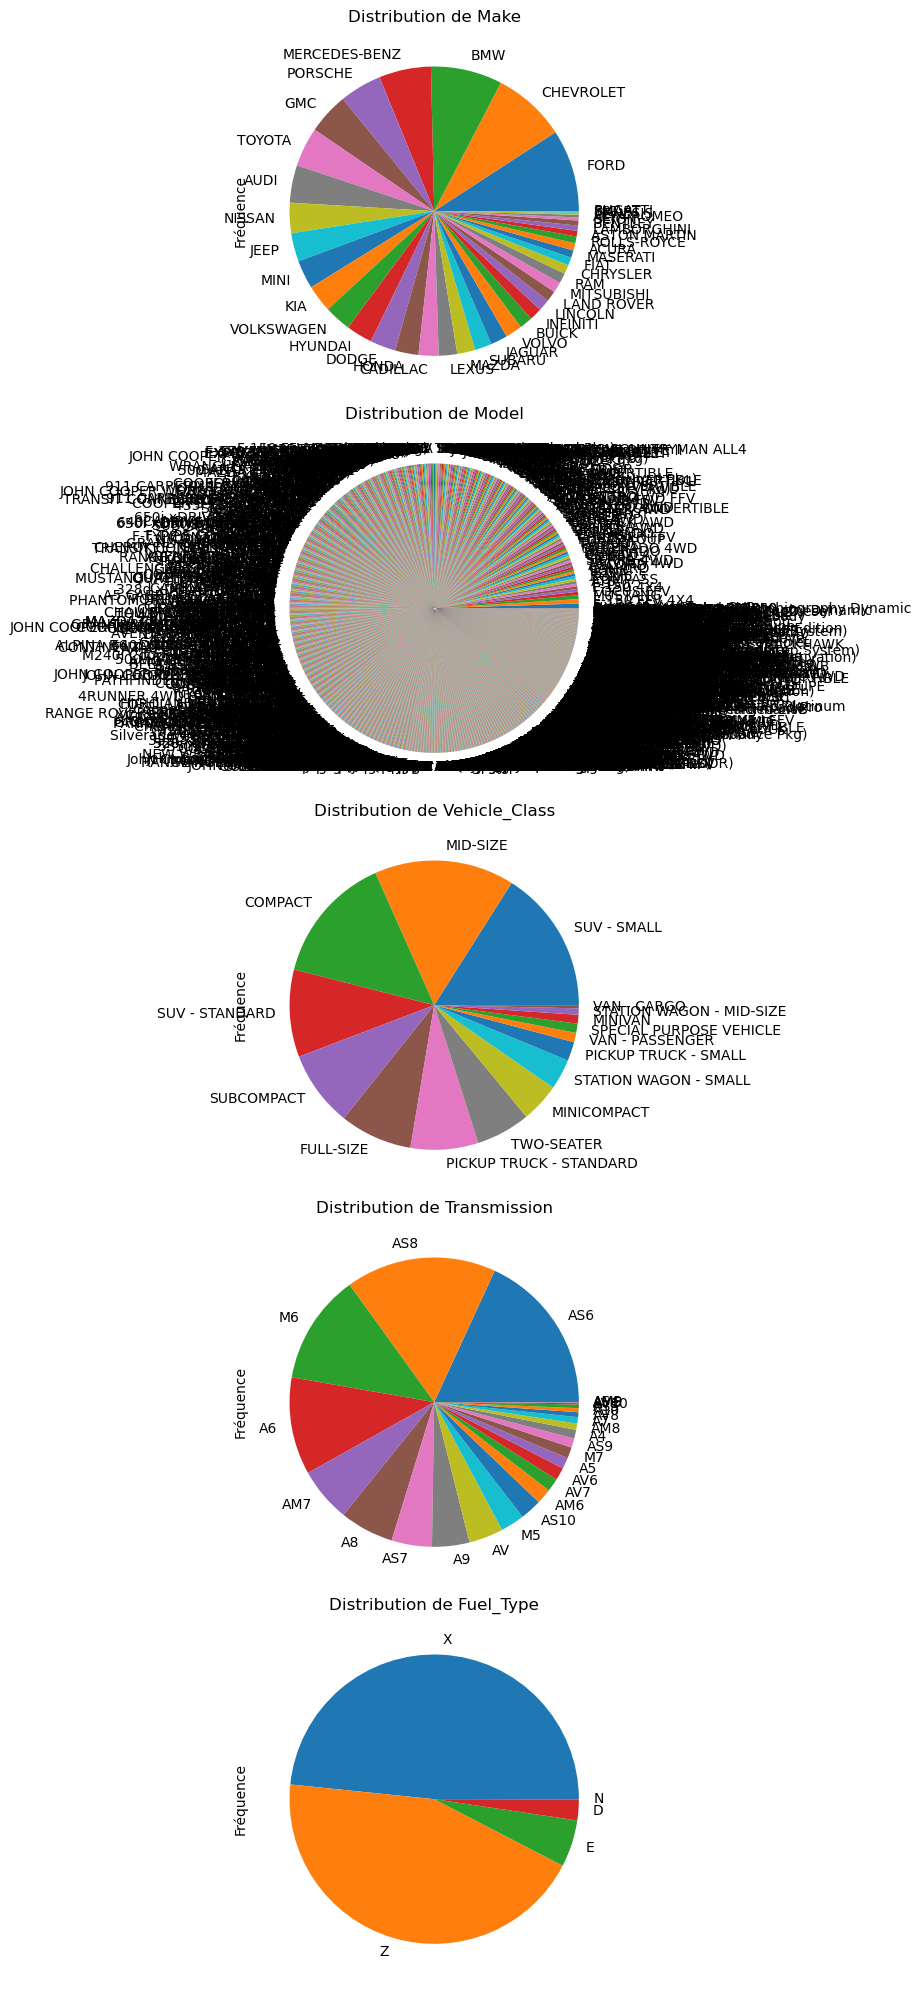

In [56]:
fig, axes = plt.subplots(len(qual_vars), 1, figsize=(8, 4*len(qual_vars)))

for ax, variable in zip(axes, qual_vars):
    data[variable].value_counts(normalize=True).plot(kind='pie', ax=ax)
    ax.set_title(f"Distribution de {variable}")
    ax.set_ylabel("Fréquence")

plt.tight_layout()
plt.show()


# Analyse des variables quantitatives


ANALYSE DE : Engine_Size_L

--- Tendances centrales ---
Mode : 2.00
Moyenne : 3.16
Médiane : 3.00

--- Mesures de dispersion ---
Variance empirique : 1.8635
Écart-type empirique : 1.3651
Variance corrigée : 1.8638
Coefficient de variation : 43.17%

Q1 : 2.00
Q2 (Médiane) : 3.00
Q3 : 3.70
Écart interquartile (IQR) : 1.70
Écart moyen absolu : 1.09

--- Mesures de forme ---
Skewness (asymétrie) : 0.812
  → Distribution étalée à droite
Kurtosis (aplatissement) : -0.152
  → Aplatissement similaire à la loi normale


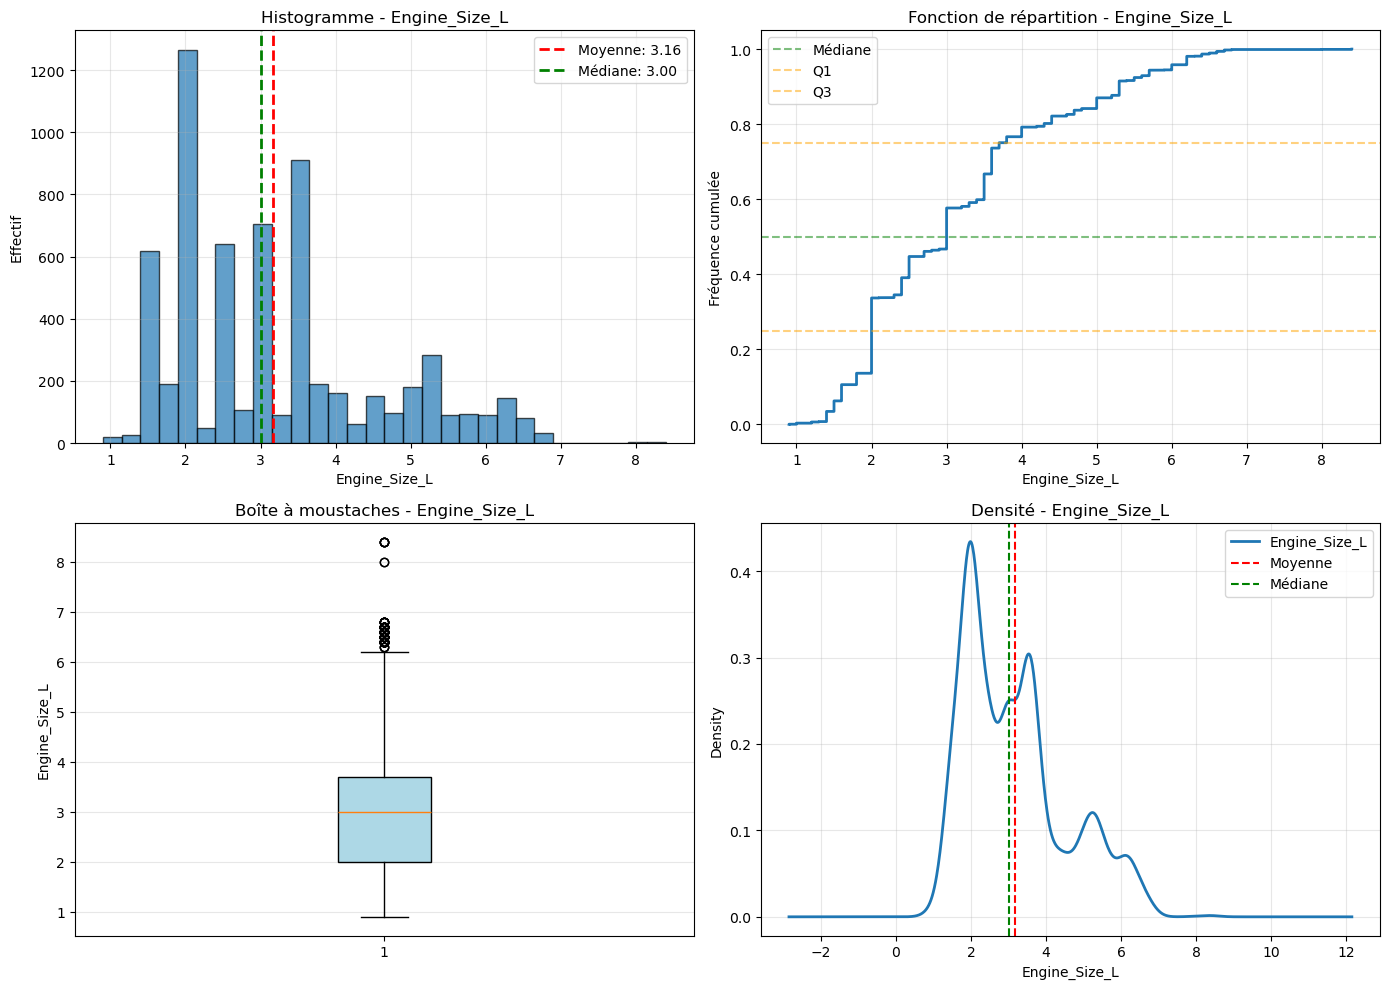


ANALYSE DE : Cylinders

--- Tendances centrales ---
Mode : 4.00
Moyenne : 5.62
Médiane : 6.00

--- Mesures de dispersion ---
Variance empirique : 3.4081
Écart-type empirique : 1.8461
Variance corrigée : 3.4086
Coefficient de variation : 32.86%

Q1 : 4.00
Q2 (Médiane) : 6.00
Q3 : 6.00
Écart interquartile (IQR) : 2.00
Écart moyen absolu : 1.46

--- Mesures de forme ---
Skewness (asymétrie) : 1.108
  → Distribution étalée à droite
Kurtosis (aplatissement) : 1.436
  → Distribution moins aplatie que la loi normale (plus concentrée)


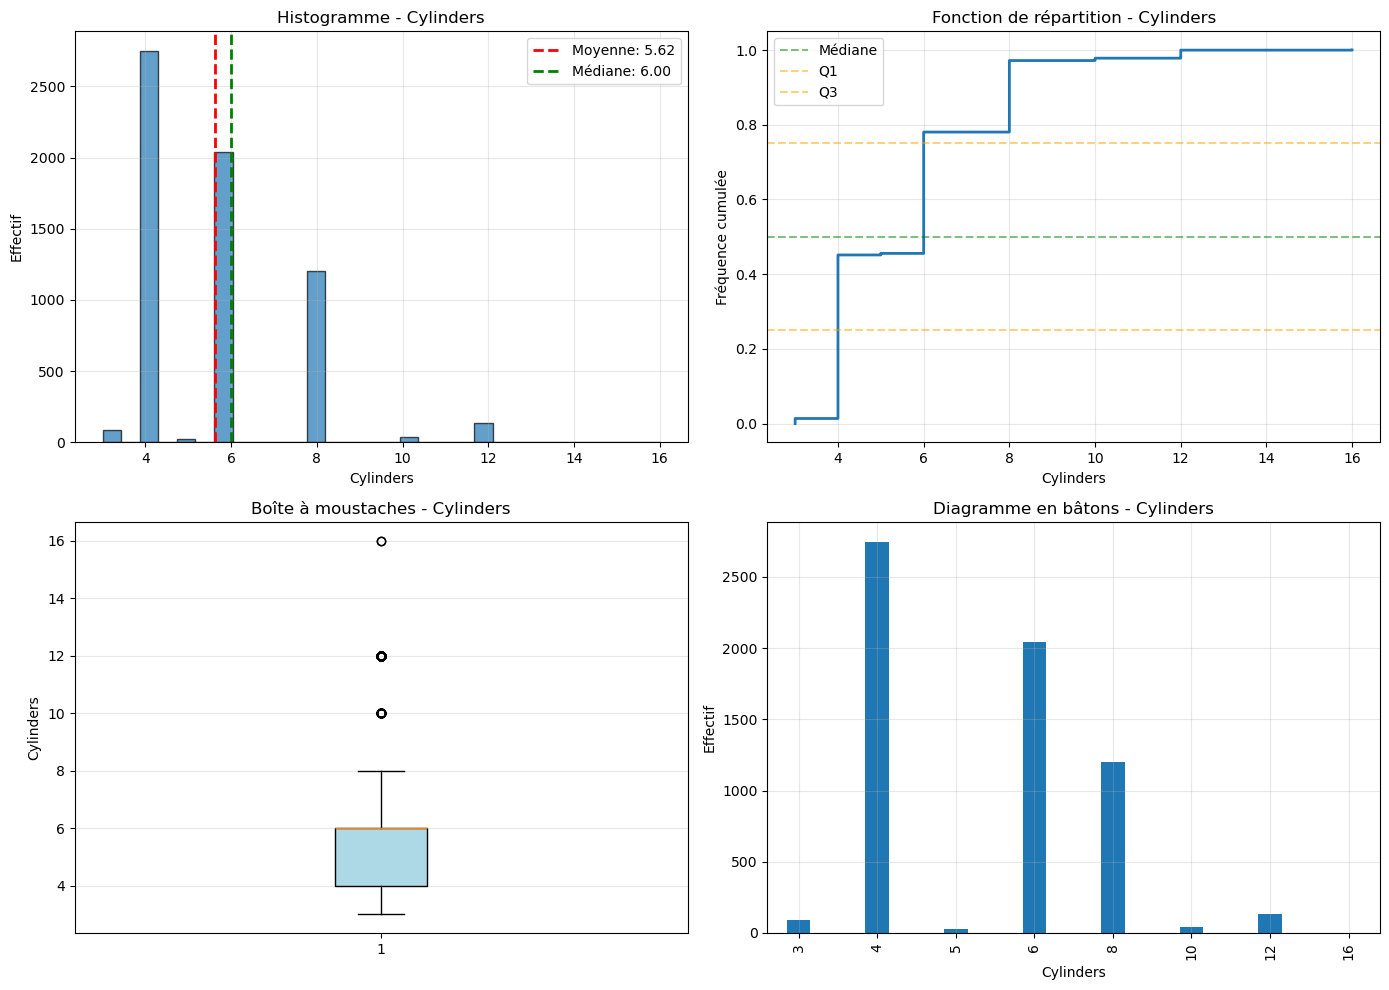


ANALYSE DE : Fuel_City_L100km

--- Tendances centrales ---
Mode : 11.90
Moyenne : 12.61
Médiane : 12.10

--- Mesures de dispersion ---
Variance empirique : 12.6223
Écart-type empirique : 3.5528
Variance corrigée : 12.6243
Coefficient de variation : 28.17%

Q1 : 10.10
Q2 (Médiane) : 12.10
Q3 : 14.70
Écart interquartile (IQR) : 4.60
Écart moyen absolu : 2.73

--- Mesures de forme ---
Skewness (asymétrie) : 0.839
  → Distribution étalée à droite
Kurtosis (aplatissement) : 1.201
  → Distribution moins aplatie que la loi normale (plus concentrée)


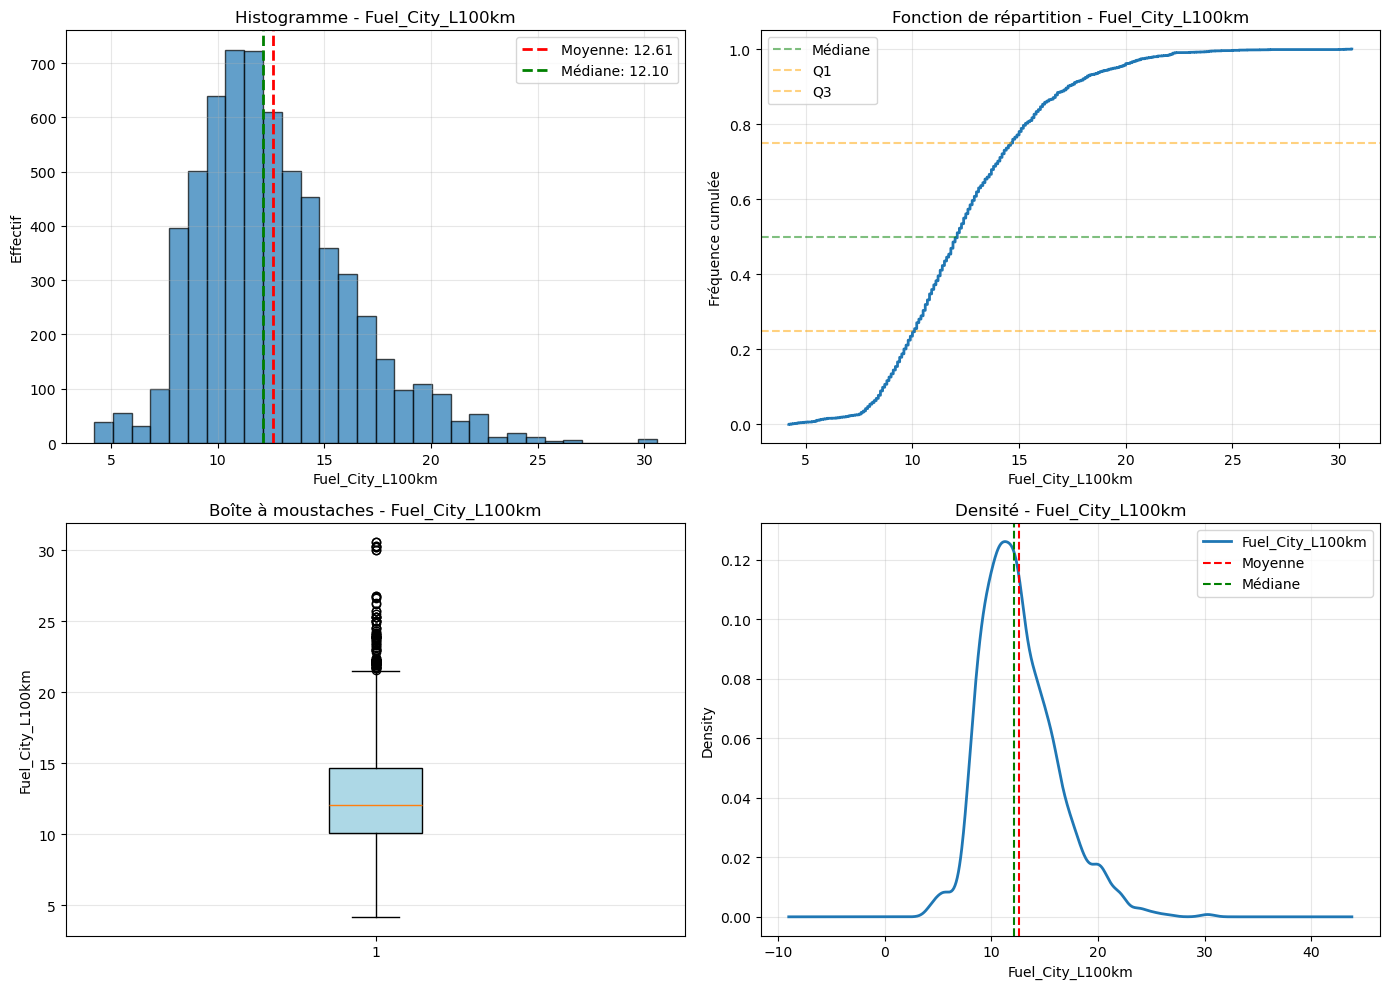


ANALYSE DE : Fuel_Hwy_L100km

--- Tendances centrales ---
Mode : 7.80
Moyenne : 9.07
Médiane : 8.70

--- Mesures de dispersion ---
Variance empirique : 5.1925
Écart-type empirique : 2.2787
Variance corrigée : 5.1933
Coefficient de variation : 25.12%

Q1 : 7.50
Q2 (Médiane) : 8.70
Q3 : 10.30
Écart interquartile (IQR) : 2.80
Écart moyen absolu : 1.72

--- Mesures de forme ---
Skewness (asymétrie) : 1.109
  → Distribution étalée à droite
Kurtosis (aplatissement) : 2.001
  → Distribution moins aplatie que la loi normale (plus concentrée)


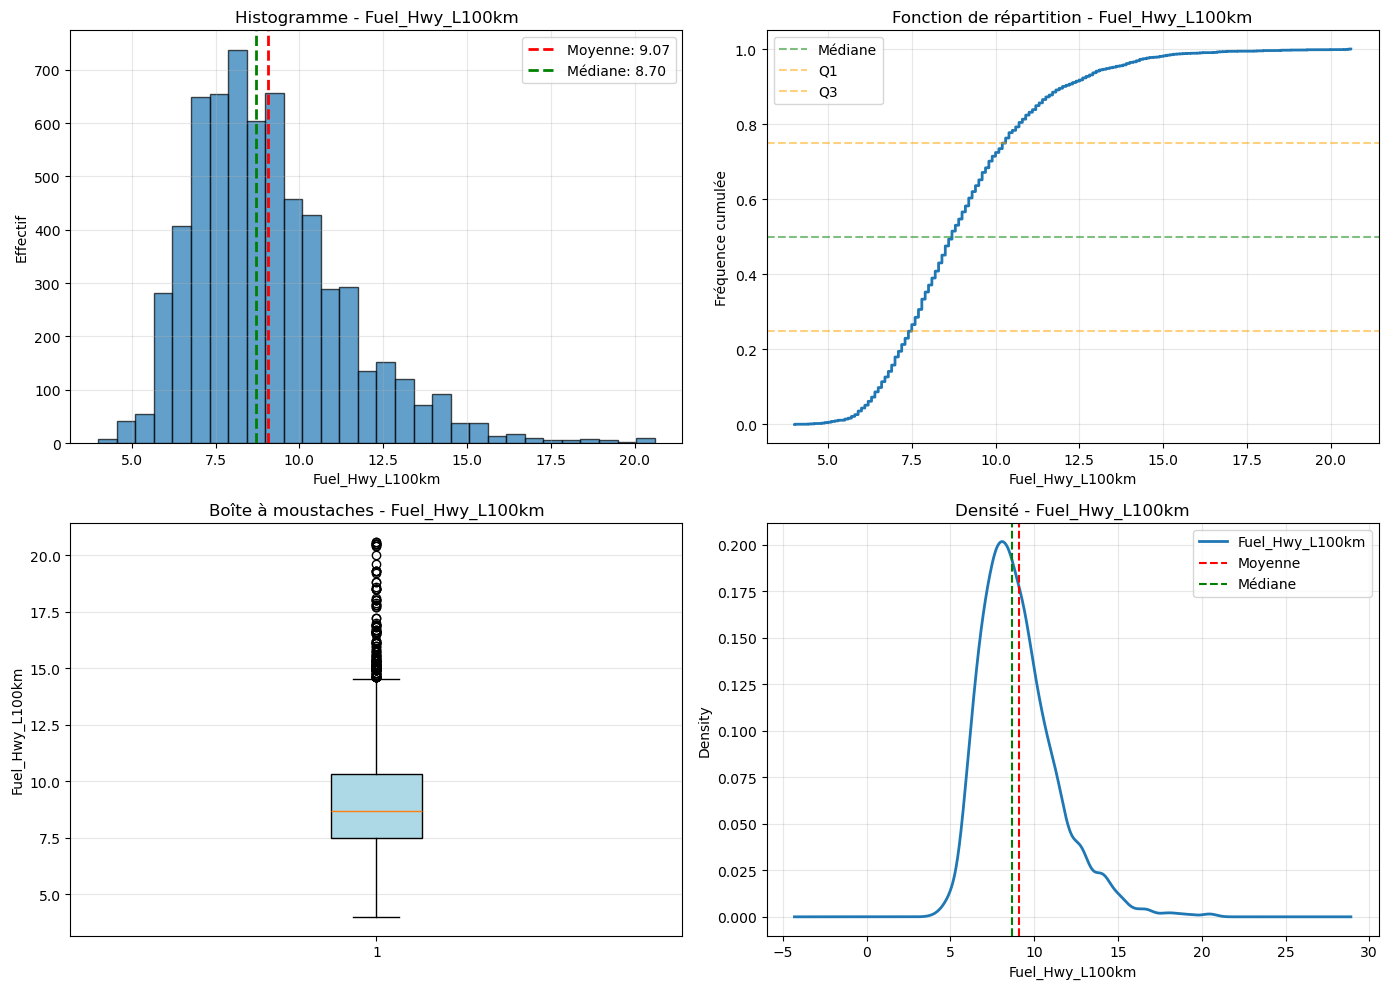


ANALYSE DE : Fuel_Comb_L100km

--- Tendances centrales ---
Mode : 9.40
Moyenne : 11.02
Médiane : 10.60

--- Mesures de dispersion ---
Variance empirique : 8.6827
Écart-type empirique : 2.9466
Variance corrigée : 8.6841
Coefficient de variation : 26.74%

Q1 : 8.90
Q2 (Médiane) : 10.60
Q3 : 12.70
Écart interquartile (IQR) : 3.80
Écart moyen absolu : 2.26

--- Mesures de forme ---
Skewness (asymétrie) : 0.924
  → Distribution étalée à droite
Kurtosis (aplatissement) : 1.397
  → Distribution moins aplatie que la loi normale (plus concentrée)


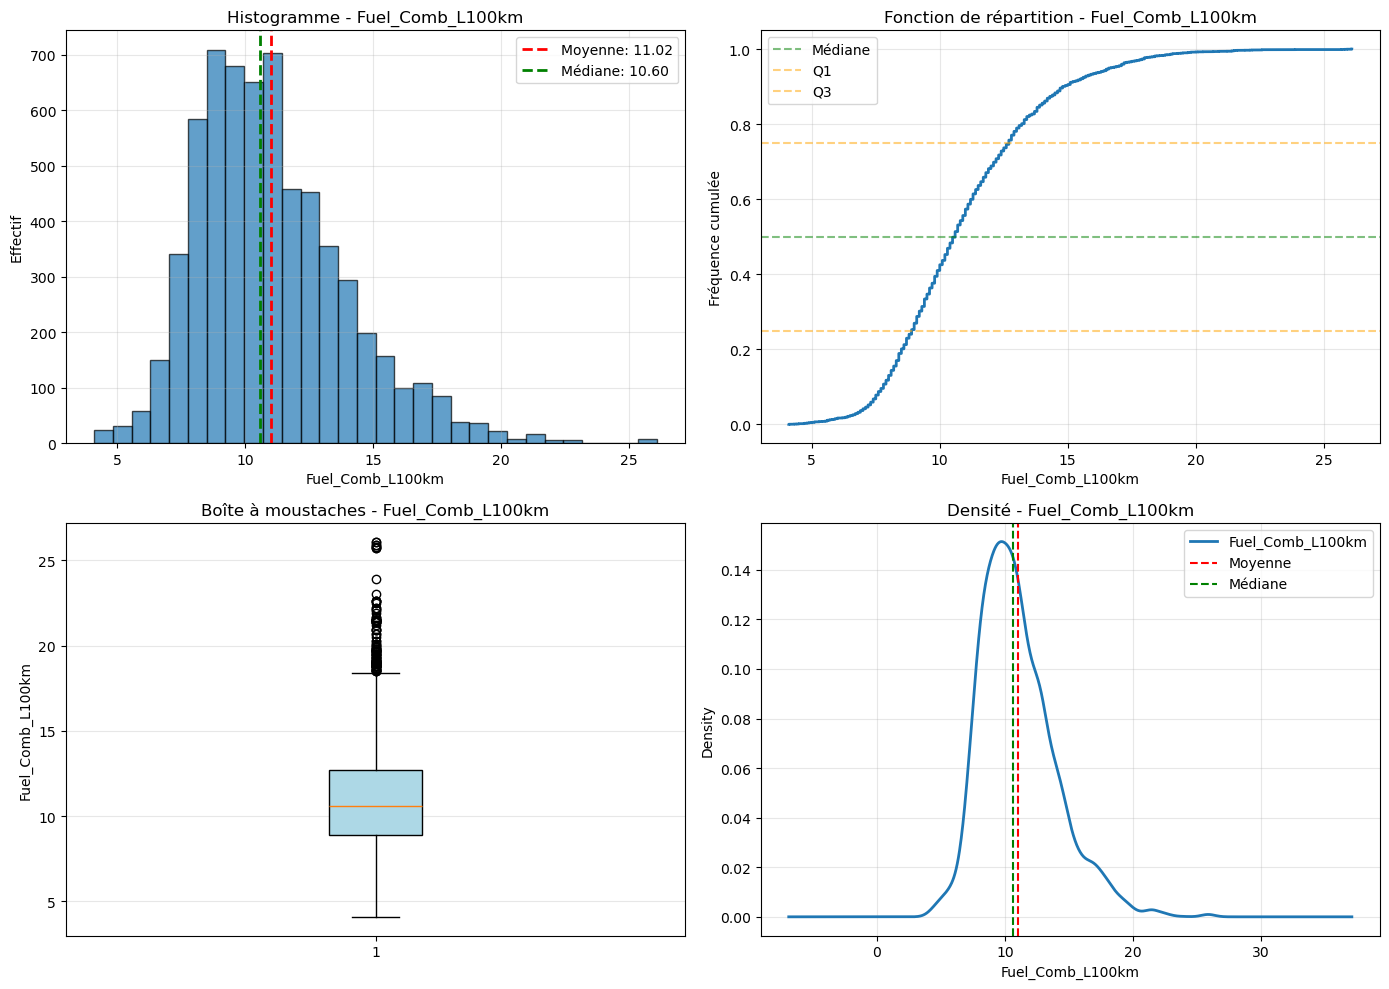


ANALYSE DE : Fuel_Comb_mpg

--- Tendances centrales ---
Mode : 25.00
Moyenne : 27.41
Médiane : 27.00

--- Mesures de dispersion ---
Variance empirique : 52.4863
Écart-type empirique : 7.2447
Variance corrigée : 52.4946
Coefficient de variation : 26.43%

Q1 : 22.00
Q2 (Médiane) : 27.00
Q3 : 32.00
Écart interquartile (IQR) : 10.00
Écart moyen absolu : 5.56

--- Mesures de forme ---
Skewness (asymétrie) : 0.923
  → Distribution étalée à droite
Kurtosis (aplatissement) : 2.304
  → Distribution moins aplatie que la loi normale (plus concentrée)


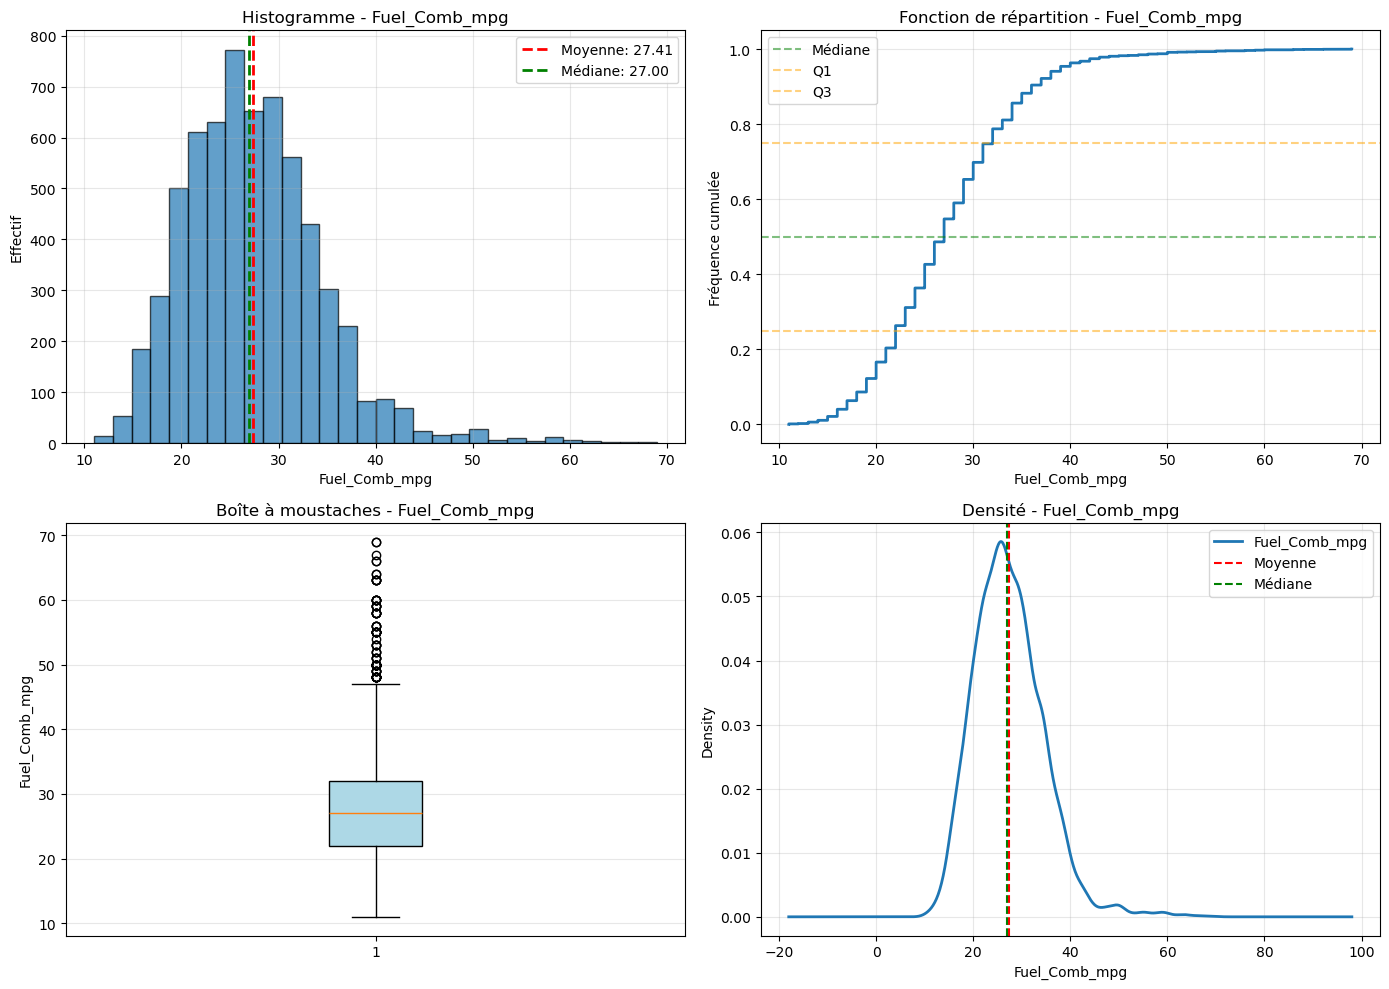


ANALYSE DE : CO2_Emissions_gkm

--- Tendances centrales ---
Mode : 221.00
Moyenne : 251.16
Médiane : 246.00

--- Mesures de dispersion ---
Variance empirique : 3514.7951
Écart-type empirique : 59.2857
Variance corrigée : 3515.3547
Coefficient de variation : 23.60%

Q1 : 208.00
Q2 (Médiane) : 246.00
Q3 : 289.00
Écart interquartile (IQR) : 81.00
Écart moyen absolu : 47.01

--- Mesures de forme ---
Skewness (asymétrie) : 0.556
  → Distribution étalée à droite
Kurtosis (aplatissement) : 0.441
  → Aplatissement similaire à la loi normale


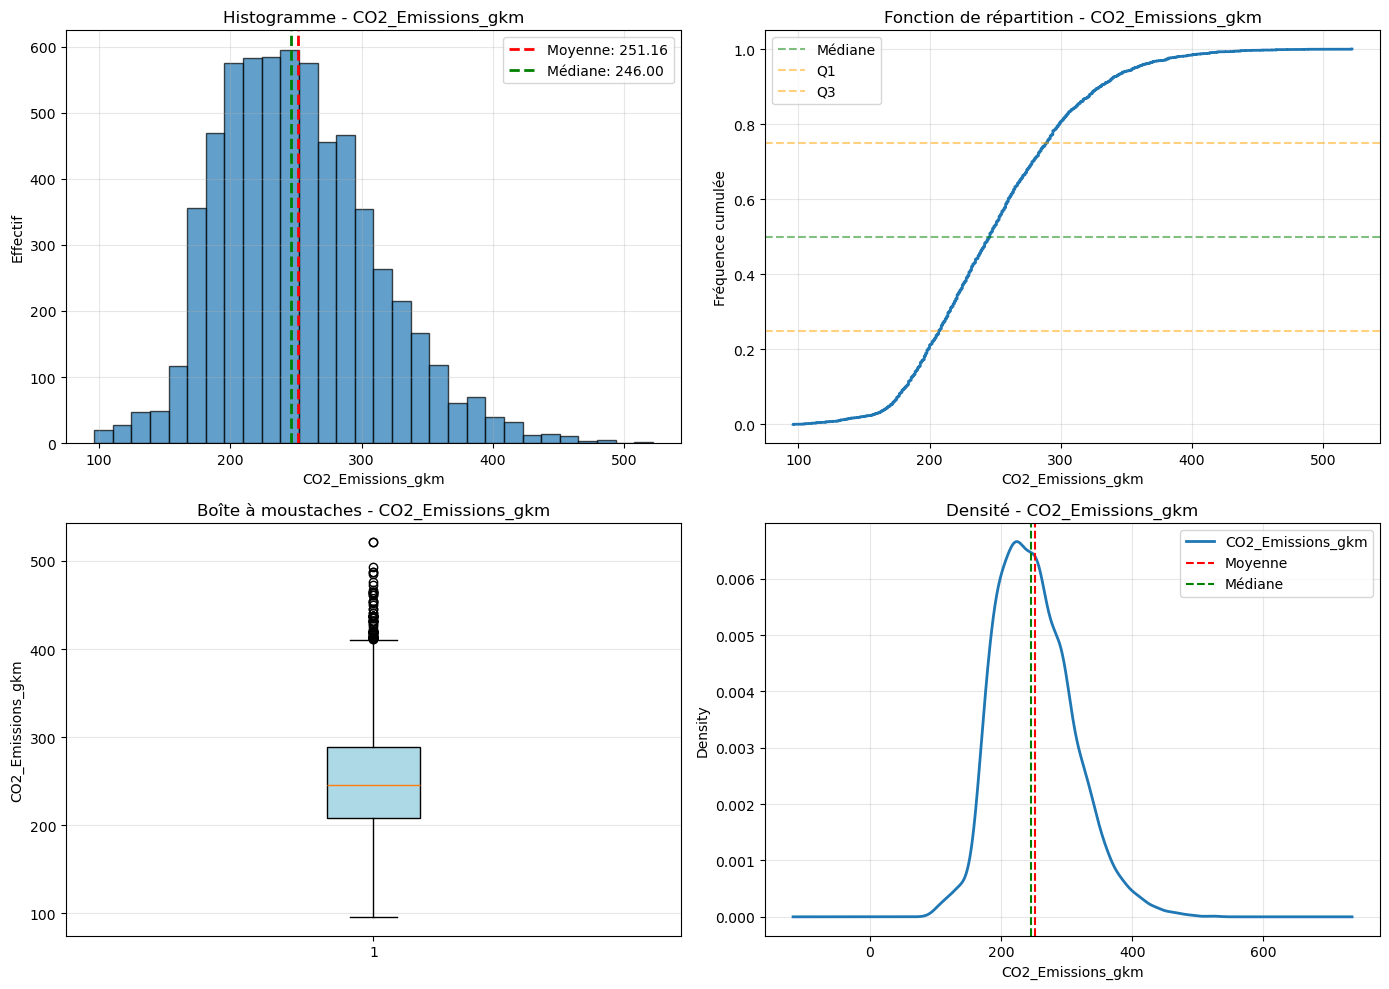

In [57]:
for var in quant_vars:
    print(f"\n{'='*60}")
    print(f"ANALYSE DE : {var}")
    print(f"{'='*60}")
    
    # MESURES DE TENDANCES CENTRALES
    print("\n--- Tendances centrales ---")
    mode = data[var].mode()[0]
    moyenne = data[var].mean()
    mediane = data[var].median()
    
    print(f"Mode : {mode:.2f}")
    print(f"Moyenne : {moyenne:.2f}")
    print(f"Médiane : {mediane:.2f}")
    
    # MESURES DE DISPERSION
    print("\n--- Mesures de dispersion ---")
    variance = data[var].var(ddof=0)
    ecart_type = data[var].std(ddof=0)
    variance_corrigee = data[var].var(ddof=1)
    cv = (ecart_type / moyenne) * 100
    
    q1 = data[var].quantile(0.25)
    q3 = data[var].quantile(0.75)
    iqr = q3 - q1
    ema = np.mean(np.abs(data[var] - mediane))
    
    print(f"Variance empirique : {variance:.4f}")
    print(f"Écart-type empirique : {ecart_type:.4f}")
    print(f"Variance corrigée : {variance_corrigee:.4f}")
    print(f"Coefficient de variation : {cv:.2f}%")
    print("")
    print(f"Q1 : {q1:.2f}")
    print(f"Q2 (Médiane) : {mediane:.2f}")
    print(f"Q3 : {q3:.2f}")
    print(f"Écart interquartile (IQR) : {iqr:.2f}")
    print(f"Écart moyen absolu : {ema:.2f}")
    
    # MESURES DE FORME
    print("\n--- Mesures de forme ---")
    skewness = data[var].skew()
    kurtosis = data[var].kurtosis()
    
    print(f"Skewness (asymétrie) : {skewness:.3f}")
    if abs(skewness) < 0.5:
        print("  → Distribution symétrique")
    elif skewness > 0:
        print("  → Distribution étalée à droite")
    else:
        print("  → Distribution étalée à gauche")
    
    print(f"Kurtosis (aplatissement) : {kurtosis:.3f}")
    if abs(kurtosis) < 0.5:
        print("  → Aplatissement similaire à la loi normale")
    elif kurtosis > 0:
        print("  → Distribution moins aplatie que la loi normale (plus concentrée)")
    else:
        print("  → Distribution plus aplatie que la loi normale (moins concentrée)")
    
    # GRAPHIQUES
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Histogramme
    axes[0, 0].hist(data[var], bins=30, edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(moyenne, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {moyenne:.2f}')
    axes[0, 0].axvline(mediane, color='green', linestyle='--', linewidth=2, label=f'Médiane: {mediane:.2f}')
    axes[0, 0].set_title(f'Histogramme - {var}')
    axes[0, 0].set_xlabel(var)
    axes[0, 0].set_ylabel('Effectif')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Fonction de répartition
    sorted_data = np.sort(data[var])
    cumulative = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    axes[0, 1].plot(sorted_data, cumulative, drawstyle='steps-post', linewidth=2)
    axes[0, 1].axhline(0.5, color='green', linestyle='--', alpha=0.5, label='Médiane')
    axes[0, 1].axhline(0.25, color='orange', linestyle='--', alpha=0.5, label='Q1')
    axes[0, 1].axhline(0.75, color='orange', linestyle='--', alpha=0.5, label='Q3')
    axes[0, 1].set_title(f'Fonction de répartition - {var}')
    axes[0, 1].set_xlabel(var)
    axes[0, 1].set_ylabel('Fréquence cumulée')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Boîte à moustaches
    bp = axes[1, 0].boxplot(data[var], vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    axes[1, 0].set_title(f'Boîte à moustaches - {var}')
    axes[1, 0].set_ylabel(var)
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # Diagramme en bâtons (si discrète) ou densité (si continue)
    if data[var].nunique() < 20:
        data[var].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], width=0.3)
        axes[1, 1].set_title(f'Diagramme en bâtons - {var}')
        axes[1, 1].set_xlabel(var)
        axes[1, 1].set_ylabel('Effectif')
    else:
        data[var].plot(kind='density', ax=axes[1, 1], linewidth=2)
        axes[1, 1].axvline(moyenne, color='red', linestyle='--', label='Moyenne')
        axes[1, 1].axvline(mediane, color='green', linestyle='--', label='Médiane')
        axes[1, 1].set_title(f'Densité - {var}')
        axes[1, 1].set_xlabel(var)
        axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [58]:
print("\n" + "="*60)
print("TABLEAU RÉCAPITULATIF")
print("="*60 + "\n")

recap = pd.DataFrame({
    'Variable': quant_vars,
    'Moyenne': [data[v].mean() for v in quant_vars],
    'Médiane': [data[v].median() for v in quant_vars],
    'Écart-type': [data[v].std(ddof=0) for v in quant_vars],
    'CV(%)': [(data[v].std(ddof=0)/data[v].mean()*100) for v in quant_vars],
    'Q1': [data[v].quantile(0.25) for v in quant_vars],
    'Q3': [data[v].quantile(0.75) for v in quant_vars],
    'IQR': [data[v].quantile(0.75) - data[v].quantile(0.25) for v in quant_vars],
    'Skewness': [data[v].skew() for v in quant_vars],
    'Kurtosis': [data[v].kurtosis() for v in quant_vars]
})

print(recap.round(2).to_string(index=False))

print("\n" + "="*60)
print("ANALYSE TERMINÉE")
print("="*60)


TABLEAU RÉCAPITULATIF

         Variable  Moyenne  Médiane  Écart-type  CV(%)    Q1    Q3  IQR  Skewness  Kurtosis
    Engine_Size_L     3.16      3.0        1.37  43.17   2.0   3.7  1.7      0.81     -0.15
        Cylinders     5.62      6.0        1.85  32.86   4.0   6.0  2.0      1.11      1.44
 Fuel_City_L100km    12.61     12.1        3.55  28.17  10.1  14.7  4.6      0.84      1.20
  Fuel_Hwy_L100km     9.07      8.7        2.28  25.12   7.5  10.3  2.8      1.11      2.00
 Fuel_Comb_L100km    11.02     10.6        2.95  26.74   8.9  12.7  3.8      0.92      1.40
    Fuel_Comb_mpg    27.41     27.0        7.24  26.43  22.0  32.0 10.0      0.92      2.30
CO2_Emissions_gkm   251.16    246.0       59.29  23.60 208.0 289.0 81.0      0.56      0.44

ANALYSE TERMINÉE
